<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/salary-prediction-polynomial-regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [3]:
data = pd.read_csv('/content/salary.csv')
data.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,220000
8,C.level,9,250000
9,CEO,10,1000000


In [4]:
print(data.shape)
print(data.columns)
print(data['Level '])

(10, 3)
Index(['Position', 'Level ', 'Salary'], dtype='object')
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level , dtype: int64


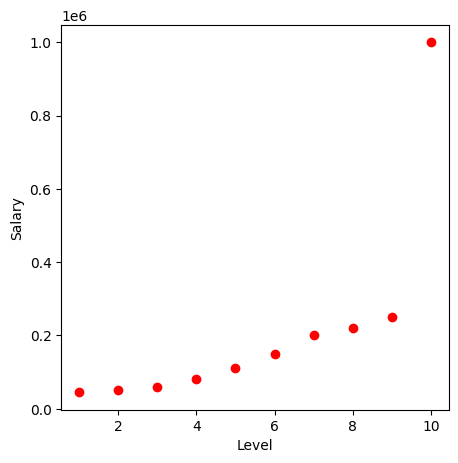

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(data['Level '], data['Salary'], c='r')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

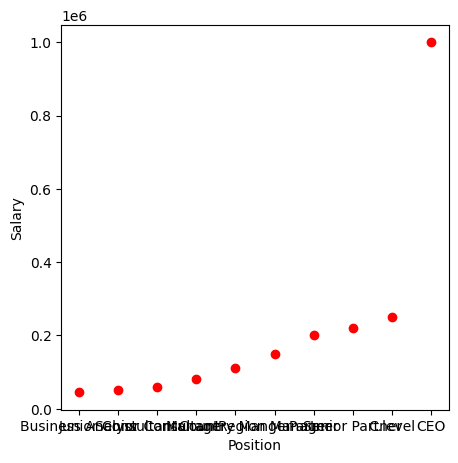

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(data['Position'], data['Salary'], c='r')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [7]:
print(data.info)

<bound method DataFrame.info of             Position  Level    Salary
0   Business Analyst       1    45000
1  Junior Consultant       2    50000
2  Senior Consultant       3    60000
3            Manager       4    80000
4     Country Manger       5   110000
5     Region Manager       6   150000
6            Partner       7   200000
7     Senior Partner       8   220000
8            C.level       9   250000
9                CEO      10  1000000>


In [8]:
data.drop(['Position'], axis=1)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,220000
8,9,250000
9,10,1000000


In [9]:
X = data.drop(['Salary', 'Position'], axis=1)
y = data['Salary']
print(X)
print(y.shape)

   Level 
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
(10,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [11]:
print(X_train)
print(y_train)

   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
5     150000
0      45000
7     220000
2      60000
9    1000000
4     110000
3      80000
6     200000
Name: Salary, dtype: int64


In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_train_pred = lr.predict(X_train)
print(y_train_pred)

[ 275344.82758621 -146853.44827586  444224.13793103   22025.86206897
  613103.44827586  190905.17241379  106465.51724138  359784.48275862]


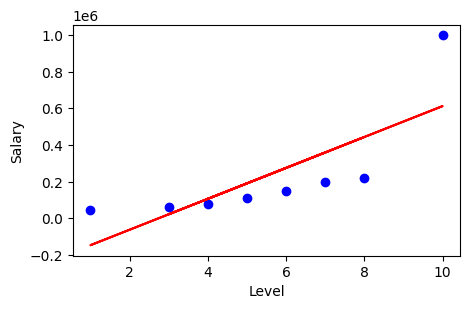

In [14]:
plt.figure(figsize=(5,3))
plt.scatter(X_train, y_train, c='b')
plt.plot(X_train, y_train_pred, c='r')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [15]:
print(f'Train Mean squared Error: {mean_squared_error(y_train, y_train_pred)}')
print(f'Train Mean absoulte Error: {mean_absolute_error(y_train, y_train_pred)}')
print(f'Train Mean absoulte percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred)}')
print(f'Train R2 Score: {r2_score(y_train, y_train_pred)}')

Train Mean squared Error: 35837957974.137924
Train Mean absoulte Error: 154181.0344827586
Train Mean absoulte percentage Error: 1.1254105712295366
Train R2 Score: 0.590567735424591


In [16]:
y_test_pred = lr.predict(X_test)
print(y_test_pred)

[528663.79310345 -62413.79310345]


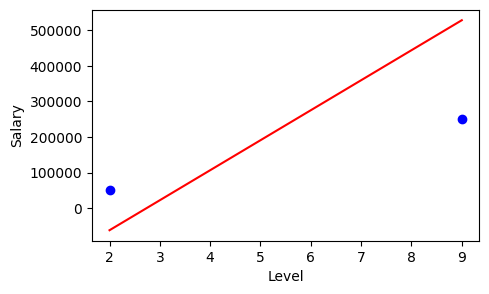

In [17]:
plt.figure(figsize=(5,3))
plt.scatter(X_test, y_test, c='b')
plt.plot(X_test, y_test_pred, c='r')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [18]:
print(f'Test Mean squared Error: {mean_squared_error(y_test, y_test_pred)}')
print(f'Test Mean absoulte Error: {mean_absolute_error(y_test, y_test_pred)}')
print(f'Test Mean absoulte percentage Error: {mean_absolute_percentage_error(y_test, y_test_pred)}')
print(f'Test R2 Score: {r2_score(y_test, y_test_pred)}')

Test Mean squared Error: 45145185233.35314
Test Mean absoulte Error: 195538.79310344823
Test Mean absoulte percentage Error: 1.681465517241379
Test R2 Score: -3.5145185233353144


In [19]:
plr = PolynomialFeatures(degree=3)
X_train_poly =plr.fit_transform(X_train)
X_test_poly =plr.fit_transform(X_test)

In [20]:
lr2 = LinearRegression()
lr2.fit(X_train_poly, y_train)

LinearRegression()

In [21]:
y_plr_train_pred = lr2.predict(X_train_poly)
print(y_plr_train_pred)

[ 95402.45496472  27328.40261704 315822.43784196 109095.59494492
 976237.17115345  81523.77454348  95243.71725628 164346.44667815]


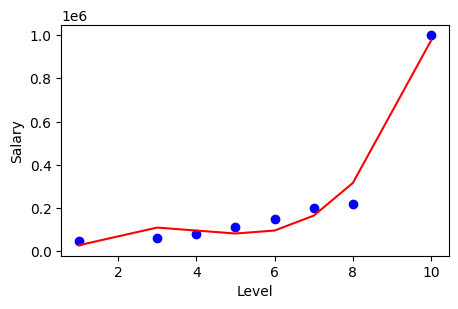

In [22]:
sorted_indices = X_train['Level '].argsort()
X_train_sorted = X_train.iloc[sorted_indices]
y_pred_sorted = y_plr_train_pred[sorted_indices]
plt.figure(figsize=(5,3))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.plot(X_train_sorted, y_pred_sorted, c='r', label='Polynomial fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [23]:
print(f'Polynomial Train Mean squared Error: {mean_squared_error(y_train, y_plr_train_pred)}')
print(f'Polynomial Train Mean absoulte Error: {mean_absolute_error(y_train, y_plr_train_pred)}')
print(f'Polynomial Train Mean absoulte percentage Error: {mean_absolute_percentage_error(y_train, y_plr_train_pred)}')
print(f'Polynomial Train R2 Score: {r2_score(y_train, y_plr_train_pred)}')

Polynomial Train Mean squared Error: 2220576068.277836
Polynomial Train Mean absoulte Error: 40040.43751079128
Polynomial Train Mean absoulte percentage Error: 0.33274426088313663
Polynomial Train R2 Score: 0.9746309349167425


In [24]:
y_poly_test_pred = lr2.predict(X_test_poly)
print(y_poly_test_pred)

[577297.11661434  95612.71945123]


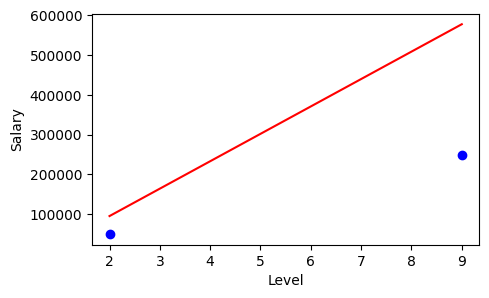

In [25]:
sorted_indices = X_test['Level '].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_pred_sorted = y_poly_test_pred[sorted_indices]
plt.figure(figsize=(5,3))
plt.scatter(X_test, y_test, c='b', label='Testing data')
plt.plot(X_test_sorted, y_pred_sorted, c='r', label='Polynomial fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


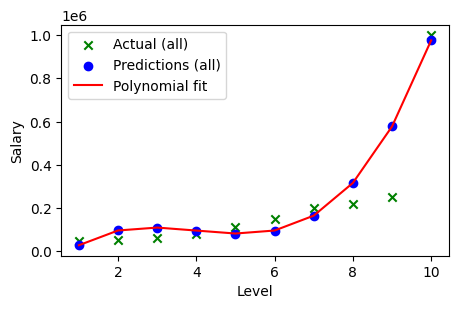

In [26]:
Y_full = np.concatenate([y_plr_train_pred, y_poly_test_pred])  # Make sure it's a NumPy array
X_full = pd.concat([X_train, X_test], axis=0)
print(X_full)

# Fix column name — remove trailing spaces
X_full.columns = X_full.columns.str.strip()

# Sort by Level
sorted_indices = X_full['Level'].argsort().values
X_full_sorted = X_full.iloc[sorted_indices]
Y_full_sorted = Y_full[sorted_indices]

# Plot
plt.figure(figsize=(5, 3))
plt.scatter(data['Level '], data['Salary'], c='g', marker='x', label='Actual (all)')
plt.scatter(X_full, Y_full, c='b', label='Predictions (all)')
plt.plot(X_full_sorted, Y_full_sorted, c='r', label='Polynomial fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [42]:
def polynomial_regression(degree):
  poly_features = PolynomialFeatures(degree=degree, include_bias=True)
  x_train_poly = poly_features.fit_transform(X_train)
  regression = LinearRegression()
  regression.fit(x_train_poly, y_train)
  y_train_pred = regression.predict(x_train_poly)
  y_pred = regression.predict(poly_features.fit_transform(X_test))
  return y_train_pred,y_pred

In [50]:
def evalutate_model(y_train_pred, y_pred,i):
  print(f'-----------For {i} polynomial degree----------------')
  print(f'Train Mean squared Error: {mean_squared_error(y_train, y_train_pred)}')
  print(f'Train Mean absoulte Error: {mean_absolute_error(y_train, y_train_pred)}')
  print(f'Train Mean absoulte percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred)}')
  print(f'Train R2 Score: {r2_score(y_train, y_train_pred)}')

  print(f'Test Mean squared Error: {mean_squared_error(y_test, y_pred)}')
  print(f'Test Mean absoulte Error: {mean_absolute_error(y_test, y_pred)}')
  print(f'Test Mean absoulte percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}')
  print(f'Test R2 Score: {r2_score(y_test, y_pred)}')
  print(f'---------------------------')

In [48]:
def plot_graph(y_train_pred, y_test_pred):
  Y_full = np.concatenate([y_train_pred, y_test_pred])  # Make sure it's a NumPy array
  X_full = pd.concat([X_train, X_test], axis=0)
  print(X_full)

  # Fix column name — remove trailing spaces
  X_full.columns = X_full.columns.str.strip()

  # Sort by Level
  sorted_indices = X_full['Level'].argsort().values
  X_full_sorted = X_full.iloc[sorted_indices]
  Y_full_sorted = Y_full[sorted_indices]

  # Plot
  plt.figure(figsize=(3, 3))
  plt.scatter(data['Level '], data['Salary'], c='b', marker='x', label='Actual (all)')
  # plt.scatter(X_full, Y_full, c='b', label='Predictions (all)')
  plt.plot(X_full_sorted, Y_full_sorted, c='r', label='Polynomial fit')
  plt.xlabel('Level')
  plt.ylabel('Salary')
  plt.legend()
  plt.show()

-----------For 1 polynomial degree----------------
Train Mean squared Error: 35837957974.13794
Train Mean absoulte Error: 154181.03448275864
Train Mean absoulte percentage Error: 1.1254105712295368
Train R2 Score: 0.5905677354245908
Test Mean squared Error: 45145185233.35317
Test Mean absoulte Error: 195538.79310344832
Test Mean absoulte percentage Error: 1.6814655172413797
Test R2 Score: -3.514518523335317
---------------------------
   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


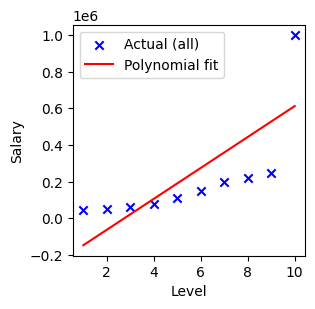

-----------For 2 polynomial degree----------------
Train Mean squared Error: 9785902390.121544
Train Mean absoulte Error: 84204.26441492373
Train Mean absoulte percentage Error: 0.7098832800071805
Train R2 Score: 0.8882005448136097
Test Mean squared Error: 73000856066.96597
Test Mean absoulte Error: 195538.79310344724
Test Mean absoulte percentage Error: 0.8548261729790729
Test R2 Score: -6.300085606696597
---------------------------
   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


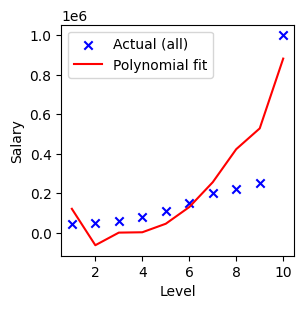

-----------For 3 polynomial degree----------------
Train Mean squared Error: 2220576068.277836
Train Mean absoulte Error: 40040.43751079128
Train Mean absoulte percentage Error: 0.33274426088313663
Train R2 Score: 0.9746309349167425
Test Mean squared Error: 54601961359.89852
Test Mean absoulte Error: 186454.9180327858
Test Mean absoulte percentage Error: 1.1107214277410042
Test R2 Score: -4.460196135989852
---------------------------
   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


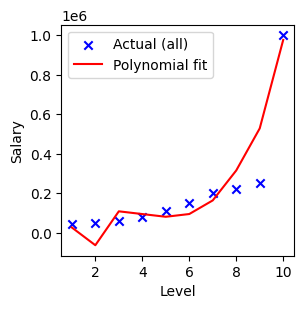

-----------For 4 polynomial degree----------------
Train Mean squared Error: 389721702.505639
Train Mean absoulte Error: 16229.58306461979
Train Mean absoulte percentage Error: 0.13595286551542185
Train R2 Score: 0.9955476079489178
Test Mean squared Error: 28864286740.52681
Test Mean absoulte Error: 140842.19858174768
Test Mean absoulte percentage Error: 0.9299901039105084
Test R2 Score: -1.8864286740526808
---------------------------
   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


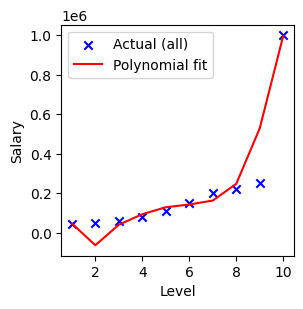

-----------For 5 polynomial degree----------------
Train Mean squared Error: 50080403.23188583
Train Mean absoulte Error: 5636.892178490467
Train Mean absoulte percentage Error: 0.046778860854752725
Train R2 Score: 0.9994278543180145
Test Mean squared Error: 12499704485.370174
Test Mean absoulte Error: 95014.53488526173
Test Mean absoulte percentage Error: 0.6687888764837117
Test R2 Score: -0.24997044853701733
---------------------------
   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


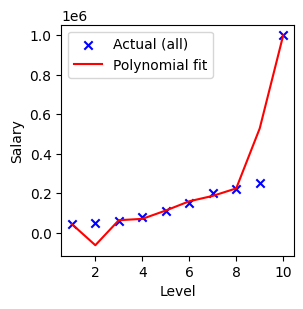

-----------For 6 polynomial degree----------------
Train Mean squared Error: 3693478.020475508
Train Mean absoulte Error: 1420.0596187866904
Train Mean absoulte percentage Error: 0.011932979965091973
Train R2 Score: 0.9999578037043524
Test Mean squared Error: 4079213046.8320227
Test Mean absoulte Error: 58923.1927513798
Test Mean absoulte percentage Error: 0.5099354567417005
Test R2 Score: 0.5920786953167978
---------------------------
   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


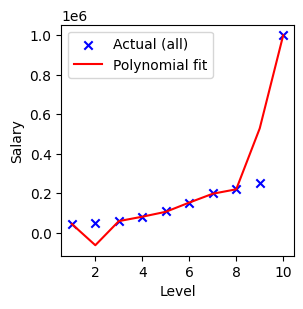

-----------For 7 polynomial degree----------------
Train Mean squared Error: 1.362615774397013e-07
Train Mean absoulte Error: 0.0002527984033804387
Train Mean absoulte percentage Error: 1.8019575432808411e-09
Train R2 Score: 1.0
Test Mean squared Error: 655495770.5991173
Test Mean absoulte Error: 24642.857439804822
Test Mean absoulte percentage Error: 0.35126986738856136
Test R2 Score: 0.9344504229400883
---------------------------
   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


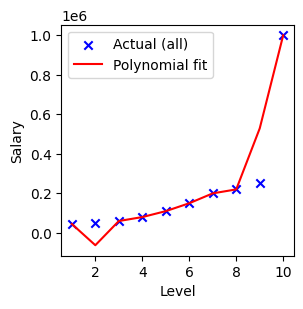

-----------For 8 polynomial degree----------------
Train Mean squared Error: 1.3753152902384088e-13
Train Mean absoulte Error: 3.0731462175026536e-07
Train Mean absoulte percentage Error: 3.666871304052289e-12
Train R2 Score: 1.0
Test Mean squared Error: 53218472.05302885
Test Mean absoulte Error: 6944.444446385882
Test Mean absoulte percentage Error: 0.10120964328294661
Test R2 Score: 0.9946781527946971
---------------------------
   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


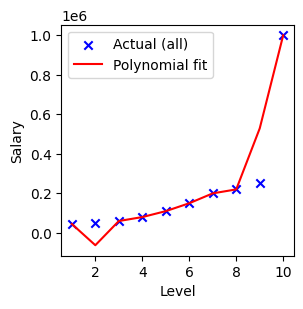

-----------For 9 polynomial degree----------------
Train Mean squared Error: 5.018266231301018e-13
Train Mean absoulte Error: 5.205320121604018e-07
Train Mean absoulte percentage Error: 3.3906413003510672e-12
Train R2 Score: 1.0
Test Mean squared Error: 418761615.05539143
Test Mean absoulte Error: 15500.978525423117
Test Mean absoulte percentage Error: 0.0791342334090294
Test R2 Score: 0.9581238384944608
---------------------------
   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


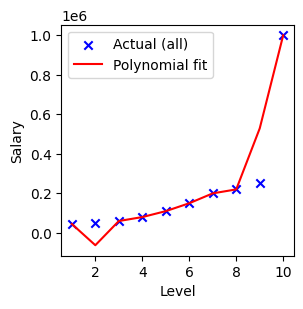

-----------For 10 polynomial degree----------------
Train Mean squared Error: 2.334010651488492e-13
Train Mean absoulte Error: 3.028926585102454e-07
Train Mean absoulte percentage Error: 1.641674022510121e-12
Train R2 Score: 1.0
Test Mean squared Error: 1521838868.097031
Test Mean absoulte Error: 27593.236155989187
Test Mean absoulte percentage Error: 0.11050845347611939
Test R2 Score: 0.8478161131902969
---------------------------
   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


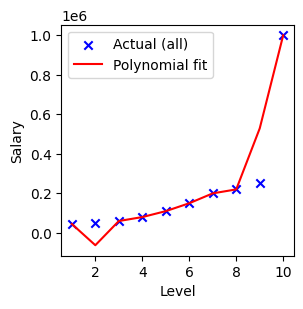

-----------For 11 polynomial degree----------------
Train Mean squared Error: 1.051488686898269e-12
Train Mean absoulte Error: 6.443024176405743e-07
Train Mean absoulte percentage Error: 2.3248770351832113e-12
Train R2 Score: 1.0
Test Mean squared Error: 3973470340.5359387
Test Mean absoulte Error: 44955.93974954185
Test Mean absoulte percentage Error: 0.18598045024877735
Test R2 Score: 0.6026529659464062
---------------------------
   Level 
5       6
0       1
7       8
2       3
9      10
4       5
3       4
6       7
8       9
1       2


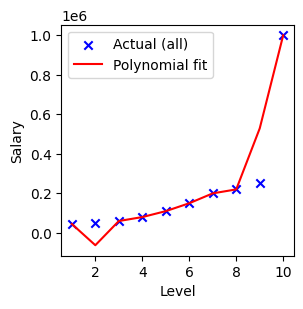

In [51]:
for i in range(1,12):
  y_train_pred, y_pred = polynomial_regression(i)
  evalutate_model(y_train_pred,y_pred,i)
  plot_graph(y_train_pred, y_test_pred)